### 3. YOLO模型预测图像
1. VOC数据集预训练网络
2. 测试VOC数据集的图片

In [1]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [2]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

/root/.local/lib/python3.5/site-packages/mxnet/gluon/block.py:421: UserWarning: load_params is deprecated. Please use load_parameters.
  warnings.warn("load_params is deprecated. Please use load_parameters.")


In [3]:
im_fname = utils.download('https://raw.githubusercontent.com/zhreshold/' +
                          'mxnet-ssd/master/data/demo/dog.jpg',
                          path='dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 672)


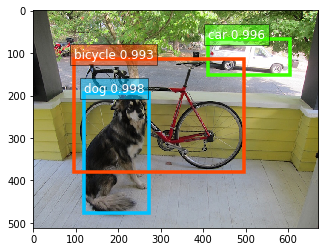

In [4]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)

plt.savefig('dog-bike.jpg')
plt.show()